In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

Here's an example fit of some completely fabricated data, just to illustrate the idea.

In [2]:
#| label: read_data
#| fig-cap: >
#|   Loading data from a csv file

df = pd.read_csv('data/test.csv')
df.head()

,t,y
0,0.000000,0.970921
1,0.263158,1.686714
2,0.526316,2.199626
3,0.789474,2.516062
4,1.052632,3.067824


In [12]:
def linear(t, m, b):
    return m*t + b

sigma_y = 0.1 # uncertainty in y values

popt, pcov = curve_fit(linear, df['t'], df['y'], sigma=sigma_y)
m, b = popt
dm, db = np.sqrt(pcov.diagonal())
mtxt = f"m = {m:0.3f} ± {dm:0.3f} m/s"
btxt = f"b = {b:0.3f} ± {db:0.3f} m"
print(f"{mtxt}; {btxt}")

m = 1.984 ± 0.015 m/s; b = 1.027 ± 0.043 m


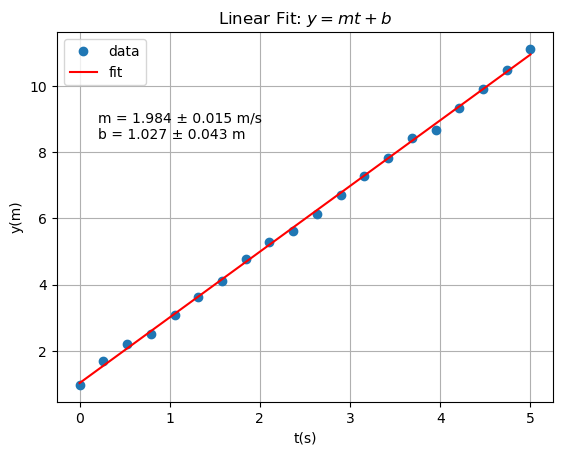

In [13]:
#| label: curve_fit_example
#| fig-cap: >
#|   Example of curve fitting with `scipy.optimize.curve_fit`.
plt.plot(df['t'], df['y'], 'o', label='data')
plt.plot(df['t'], linear(df['t'], *popt),'r-', label='fit')
plt.grid()
plt.xlabel('t(s)')
plt.ylabel('y(m)')
plt.title('Linear Fit: $y = mt + b$')
plt.legend()
plt.text(.2, 8.4, f"{mtxt}\n{btxt}") # add parameter values to plot
plt.show()
